## Data Cleaning and Transformation with Python

* Introduction

* Data & Messy Data

* What is Data Cleaning?

* What is Data Transformation?

* Data Exploration

* 101 guide to data cleaning

* 101 guide to data transformation


## Introduction

Data is messy in the real world, and it is very important to know the best practices in handling them. The event is focused on teaching participants on the techniques of how to handle missing values by implementing and discussing the pros and cons of each approach (Data Cleaning). It is also focused on teaching participants on how to handle numerical and categorical data encoding (Data Transformation) for good analysis and data science practise. At the end of the event, the participants will be introduced to various data cleaning and transformation techniques to implement and experiment in their next data science project.

### Import Libraries

In [322]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### What is data & Messy data

#### What is a data?

Data is anything we gather in raw fact. Data can be in form of numbers, strings, date, images, text, audio, etc. It can also be in structured and unstructured form.

#### What is a Messy data?

A messy data is a data that suffers from cleaniness, in which it contains incosistency and errors.

#### Data

In [323]:
### Data (In a school setting during)
school_data = {'Name':['student_A', 'student_B', 'student_c'],
 'MIDSemester_Score':[20, 10, 30],
 'Exam_Score': [40, 30, 50],
 'Total':[60, 40, 80]}

In [324]:
pd.DataFrame(school_data)

,Name,MIDSemester_Score,Exam_Score,Total
0,student_A,20,40,60
1,student_B,10,30,40
2,student_c,30,50,80


#### Messy data

In [325]:
### supermarket setting

super_market = {'Goods':['A', 'B', 'C'],
 'Price':[10, None, 60]}

In [326]:
pd.DataFrame(super_market)

,Goods,Price
0,A,10.0
1,B,NaN
2,C,60.0


### Data Exploration

* Data Understanding

* Data Types

* Duplicate values

* Missing values

#### Data Understanding

It is very important that we look at our dataset, before cleaning.

Dataset link - https://www.kaggle.com/datasets/redwankarimsony/heart-disease-data


In [327]:
# Life dataset
df1 = pd.read_csv('heart_disease_uci 2.csv')

In [328]:
## check the first 5 rows
df1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [329]:
print(f'The total shape of the data set {df1.shape}')
print(f'The total rows of the data set {df1.shape[0]}')
print(f'The total columns of the data set {df1.shape[1]}')

The total shape of the data set (920, 16)
The total rows of the data set 920
The total columns of the data set 16


In [330]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


#### Data Types

In [331]:
df1.dtypes

id            int64
age           int64
sex          object
dataset      object
cp           object
trestbps    float64
chol        float64
fbs          object
restecg      object
thalch      float64
exang        object
oldpeak     float64
slope        object
ca          float64
thal         object
num           int64
dtype: object

#### Duplicate values

In [332]:
df1[df1.duplicated()]

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num


#### Missing Values

In [333]:
df1.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [334]:
## know the missing values percentage
df1.isnull().sum()/len(df1)

id          0.000000
age         0.000000
sex         0.000000
dataset     0.000000
cp          0.000000
trestbps    0.064130
chol        0.032609
fbs         0.097826
restecg     0.002174
thalch      0.059783
exang       0.059783
oldpeak     0.067391
slope       0.335870
ca          0.664130
thal        0.528261
num         0.000000
dtype: float64

#### 101 guide to data cleaning

* Features checking

* Drop insignificant features

* Drop missing values

* Filling the missing values


#### Features checking

In [335]:
df1.columns

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

#### Drop insignificant features

* Dropping the id column is the basic (except, it has another meaning beyond serial number identification)

In [336]:
df1.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [337]:
df1 = df1.drop('id', axis=1)

#### Drop missing values

* The standard in most project is to drop any missing values greather than 30% of the total data, except:

* The feature is very important.

* The missing values data, can be traced and collected. (e.g a missing location but we observe that we have the longitude and latitude data without missing)

* Relying on Gradient boosting models (Lightgbm, Xgboost, and Catboost)



In [338]:
(df1.isnull().sum()/len(df1)*100).reset_index().sort_values(by=0, ascending=False)

,index,0
12,ca,66.413043
13,thal,52.826087
11,slope,33.586957
6,fbs,9.782609
10,oldpeak,6.739130
4,trestbps,6.413043
8,thalch,5.978261
9,exang,5.978261
5,chol,3.260870
7,restecg,0.217391


In [339]:
to_drop = ['ca', 'thal','slope']

**Method**

* drop (axis=1)

In [340]:
df1 = df1.drop(to_drop, axis=1)

In [341]:
## Testing if they have been drop from the features
assert to_drop not in list(df1.columns)

#### Filling missing values

In [342]:
miss_col = ['fbs', 'oldpeak', 'trestbps', 'thalch', 'exang', 'chol', 'restecg']

In [343]:
df1[miss_col]

,fbs,oldpeak,trestbps,thalch,exang,chol,restecg
0,True,2.3,145.0,150.0,False,233.0,lv hypertrophy
1,False,1.5,160.0,108.0,True,286.0,lv hypertrophy
2,False,2.6,120.0,129.0,True,229.0,lv hypertrophy
3,False,3.5,130.0,187.0,False,250.0,normal
4,False,1.4,130.0,172.0,False,204.0,lv hypertrophy
...,...,...,...,...,...,...,...
915,True,0.0,127.0,154.0,False,333.0,st-t abnormality
916,False,NaN,NaN,NaN,NaN,139.0,st-t abnormality
917,True,0.0,122.0,100.0,False,223.0,st-t abnormality
918,True,NaN,NaN,NaN,NaN,385.0,lv hypertrophy


* 2 boolean features are missing.

* 4 numerical features are missing.

* 1 categorical feature is missing.

In [344]:
df1_copy = df1.copy() ## make copy of the dataset before filling the missing values

#### using Threshold

* we observe that, we have less than 0.22% (2 rows) of **restecg** features missing.

* Method - dropna (subset)

In [345]:
## using subset by removing all rows with missing restecg
## Always reset index to balance the rows in order
df1 = df1.dropna(subset=['restecg']).reset_index(drop=True) 

In [346]:
### check the data set rows before and after subset
print(f'The rows before {df1_copy.shape[0]}')
print(f'The rows before {df1.shape[0]}')

The rows before 920
The rows before 918


#### Numerical data missing values

**Using Statistical method**

* Old peak

* trestbps

* thalch

* chol

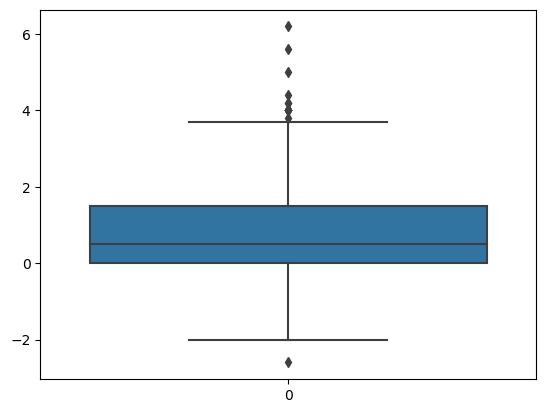

In [347]:
## look at old peak distribution
sns.boxplot(df1['oldpeak']);

The old peak distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [348]:
## Looking at the gender distribution of missing values
df1[df1['oldpeak'].isna()]['sex'].value_counts()

Male      61
Female     1
Name: sex, dtype: int64

In [349]:
df1['oldpeak'].describe()

count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: oldpeak, dtype: float64

In [350]:
df1.groupby('sex')['oldpeak'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,193.0,0.668394,0.957202,0.0,0.0,0.0,1.1,6.2
Male,663.0,0.942383,1.121150,-2.6,0.0,0.6,1.8,5.6


It is ideal to fill the missing values with each sex median values

**Method**

Transfrom and lambda

In [351]:
df1['oldpeak'] = df1.groupby('sex')['oldpeak'].transform(lambda x: x.fillna(x.median()))

In [352]:
## Testing the result
assert df1['oldpeak'].isnull().sum() == 0

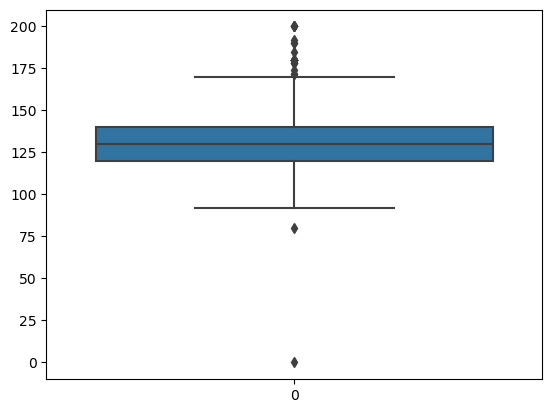

In [353]:
### looking at trestbps distribution
sns.boxplot(df1['trestbps']);

The trestbps distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [354]:
## Looking at the gender distribution of missing values
df1[df1['trestbps'].isna()]['sex'].value_counts()

Male      57
Female     2
Name: sex, dtype: int64

In [355]:
df1['trestbps'].describe()

count    859.000000
mean     132.143190
std       19.077421
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [356]:
df1.groupby('sex')['trestbps'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,192.0,132.093750,19.509202,94.0,120.0,130.0,140.0,200.0
Male,667.0,132.157421,18.966165,0.0,120.0,130.0,140.0,200.0


They both have the same median values, then, we can fill it with median values

**Method**

fillna

In [357]:
df1['trestbps'] = df1['trestbps'].fillna(value=df1['trestbps'].median())

In [358]:
## Testing the result
assert df1['trestbps'].isnull().sum() == 0

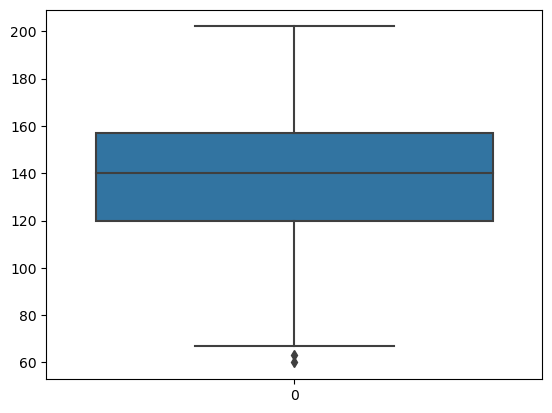

In [359]:
sns.boxplot(df1['thalch']);

The thalch distribution contains just few outliers, hence, mean imputation is ideal in filling the missing values.

In [360]:
## Looking at the gender distribution of missing values
df1[df1['thalch'].isna()]['sex'].value_counts()

Male      53
Female     2
Name: sex, dtype: int64

In [361]:
df1['thalch'].describe()

count    863.000000
mean     137.528389
std       25.950226
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: thalch, dtype: float64

In [362]:
df1.groupby('sex')['thalch'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,192.0,146.244792,22.193048,90.0,130.0,150.0,163.0,192.0
Male,671.0,135.034277,26.419357,60.0,117.0,135.0,154.5,202.0


**Method**

fillna (mean)

In [363]:
df1['thalch'] = df1['thalch'].fillna(value=df1['thalch'].median())

In [364]:
## Testing the result
assert df1['thalch'].isnull().sum() == 0

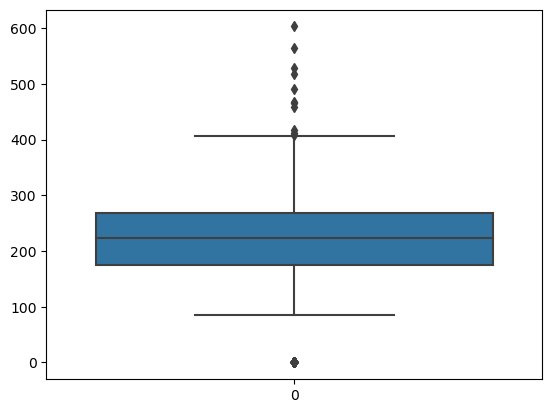

In [365]:
sns.boxplot(df1['chol']);

The chol distribution contains outliers, hence, mean imputation is not ideal in filling the missing values.

In [366]:
## Looking at the gender distribution of missing values
df1[df1['chol'].isna()]['sex'].value_counts()

Male      23
Female     7
Name: sex, dtype: int64

In [367]:
df1['chol'].describe()

count    888.000000
mean     199.246622
std      110.657036
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: chol, dtype: float64

In [368]:
df1.groupby('sex')['chol'].describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,187.0,241.481283,86.291226,0.0,204.0,244.0,291.0,564.0
Male,701.0,187.980029,113.727505,0.0,157.0,220.0,263.0,603.0


**Method**

Transform and lambda

In [370]:
df1['chol'] = df1.groupby('sex')['chol'].transform(lambda x: x.fillna(x.median()))

#### Categorical data missing values

* Mode

* Fill them with 'unknown'

In [371]:
df1['fbs'].isnull().sum()

89

In [372]:
df1['exang'].isnull().sum()

55

In [373]:
## mode for exang
df1['exang'] = df1['exang'].fillna(value=df1['exang'].mode()[0])

In [374]:
## unknown for fbs
df1['fbs'] = df1['fbs'].fillna('unknown')

**Note** 

we observe difference when we are using (mean() and median()) and mode()[0] when we fill the missing values

In [375]:
print(df1['exang'].mode())
print('------------------------')
print(df1['exang'].mode()[0])

0    False
Name: exang, dtype: bool
------------------------
False


In [376]:
print(df1['chol'].mean())
print(df1['chol'].median())

200.1078431372549
222.0


In [377]:
## check if our data set is free from missing values
assert df1.isnull().sum().sum() == 0

### 101 guide to Data Transformation

Data Transformation is a technique that is used for 

1. Encoding

2. Binning

3. Feature Engineering

4. Standardization and Normalization

5. Tf-idf


In [379]:
df1.select_dtypes('O')

,sex,dataset,cp,fbs,restecg
0,Male,Cleveland,typical angina,True,lv hypertrophy
1,Male,Cleveland,asymptomatic,False,lv hypertrophy
2,Male,Cleveland,asymptomatic,False,lv hypertrophy
3,Male,Cleveland,non-anginal,False,normal
4,Female,Cleveland,atypical angina,False,lv hypertrophy
...,...,...,...,...,...
913,Female,VA Long Beach,asymptomatic,True,st-t abnormality
914,Male,VA Long Beach,typical angina,False,st-t abnormality
915,Male,VA Long Beach,asymptomatic,True,st-t abnormality
916,Male,VA Long Beach,asymptomatic,True,lv hypertrophy


In [380]:
for cat_col in df1.select_dtypes('O').columns:
    print('------------------------')
    print(df1[cat_col].value_counts())


------------------------
Male      724
Female    194
Name: sex, dtype: int64
------------------------
Cleveland        304
Hungary          292
VA Long Beach    200
Switzerland      122
Name: dataset, dtype: int64
------------------------
asymptomatic       495
non-anginal        204
atypical angina    174
typical angina      45
Name: cp, dtype: int64
------------------------
False      691
True       138
unknown     89
Name: fbs, dtype: int64
------------------------
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: restecg, dtype: int64


#### Encoding

This is a way transform our categorical data into numbers.

* One Hot encoding

* Ordinal encoding

* Label Encoding

* Count (Frequency) encoding

* Target Encoding

* Gradient boosting encoding

**One Hot Encoding**

It is the simplest form of encoding techniques, which means transforming a categorical feature into dummy numbers of features. It is used for features with no meaningful ranking

* Pros:

1. Easy to implement.

2. useful for nominal data point.

3. preferable for low cardinality feature.

* Cons:

* Cause sparsity for high cardinality feature (it generates features by number of unique counts).

* Suffer Low performance when used for Tree based models.

In [381]:
## sex for one hot encoding
df1 = pd.get_dummies(df1, columns=['sex'])

In [382]:
df1

,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Female,sex_Male
0,63,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,0,0,1
1,67,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,2,0,1
2,67,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,1,0,1
3,37,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,0,0,1
4,41,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,1,1,0
914,62,VA Long Beach,typical angina,130.0,139.0,False,st-t abnormality,140.0,False,0.6,0,0,1
915,55,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,2,0,1
916,58,VA Long Beach,asymptomatic,130.0,385.0,True,lv hypertrophy,140.0,False,0.6,0,0,1


**Ordinal encoding**

It is the second simplest method, it takes into consideration meaningful ranking.

* Pros:

* Does not cause sparsity

* Takes order of category into consideration.

* Cons:

* Takes time to implement (High cardinal features)


In [383]:
df1.select_dtypes('bool')

,exang
0,False
1,True
2,True
3,False
4,False
...,...
913,False
914,False
915,False
916,False


In [384]:
exang_map = {True:1, False:0}

In [385]:
df1['exang'] = df1['exang'].map(exang_map)

**Label Encoding**

This encoding technique is used to transfrom feature based on the labels value in ascending order. It encodes based on alphabetical order.

* Pros:

* Easy to implement.

* Useful for both low and High cardinal features.

* Works well with Gradient boosting models.

* Cons:

* can be misleading during interpretation

In [386]:
df1['dataset'].value_counts()

Cleveland        304
Hungary          292
VA Long Beach    200
Switzerland      122
Name: dataset, dtype: int64

In [387]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [388]:
df1['dataset'] = lb.fit_transform(df1['dataset'])

In [389]:
df1['dataset'].value_counts()

0    304
1    292
3    200
2    122
Name: dataset, dtype: int64

**Count Encoding**

This encoding technique replaces each values by their value counts in the dataset.

* Pros:

* Useful for high cardinal features

* Easy to implement.

* Cons:

* Category information loss

* Overfitting machine learning models.

In [390]:
df1['fbs'].value_counts()

False      691
True       138
unknown     89
Name: fbs, dtype: int64

In [391]:
df1['fbs'] = df1['fbs'].map(df1['fbs'].value_counts().to_dict())

In [392]:
df1['fbs'].value_counts()

691    691
138    138
89      89
Name: fbs, dtype: int64

**Target Encoding**

It is an advance technique, whereby we are encoding the features with the mean values of the target feature.

* Pros:

* Hight predictive power

* Cons:

* Overfitting

* Difficult to implement

In [393]:
# Compute target means for each category
df1.groupby('cp')['num'].mean()

cp
asymptomatic       1.444444
atypical angina    0.183908
non-anginal        0.661765
typical angina     0.711111
Name: num, dtype: float64

In [394]:
tar_encoding = df1.groupby('cp')['num'].mean().to_dict()

In [395]:
df1['cp'] = df1['cp'].map(tar_encoding)

**Gradient Boosting Encoding**

it a technique where Lightgbm, Xgboost, and Catboost encode their categorical data during training.

* Pros:

* High perfomance model

* Cons:

* Time consuming

## Binning

This is the method of converting numerical data into categories

In [398]:
def age_group(x):
    if x < 35:
        return 'Yound_Adult'
    elif x > 35 and x < 65:
        return 'Adult'
    else:
        return 'Old_Age'

In [401]:
df1['age'].apply(age_group).value_counts()

Adult          784
Old_Age        114
Yound_Adult     20
Name: age, dtype: int64

### Feature Engineering

This is a form of creating new feature from existing features.

In [400]:
## we create age group from age
df1['age_group'] = df1['age'].apply(age_group)

### Standarization

Scikit-learn definition

Standardize features by removing the mean and scaling to unit variance.

The standard score of a sample x is calculated as:

    z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

Standardization of a dataset is a common requirement for many
machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).

* Pros:

* Useful for linear models (Logistic or Linear regression)

* Feature engineering

* Cons:

* Difficult to interpret

* Low Gradient boosting models performance.


In [402]:
from sklearn.preprocessing import StandardScaler, Normalizer
scale = StandardScaler()
normalize = Normalizer()

In [403]:
### let use the formular instead
df1['chol_scale'] = (df1['chol'] - df1['chol'].mean()) / df1['chol'].std()

### Tf-idf

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to reflect how important a word is to a document in a collection or corpus. It's a feature extraction method commonly used in the context of text data.

In [404]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [405]:
df1

,age,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,num,sex_Female,sex_Male,age_group,chol_scale
0,63,0,0.711111,145.0,233.0,138,lv hypertrophy,150.0,0,2.3,0,0,1,Adult,0.301906
1,67,0,1.444444,160.0,286.0,691,lv hypertrophy,108.0,1,1.5,2,0,1,Old_Age,0.788375
2,67,0,1.444444,120.0,229.0,691,lv hypertrophy,129.0,1,2.6,1,0,1,Old_Age,0.265191
3,37,0,0.661765,130.0,250.0,691,normal,187.0,0,3.5,0,0,1,Adult,0.457943
4,41,0,0.183908,130.0,204.0,691,lv hypertrophy,172.0,0,1.4,0,1,0,Adult,0.035725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,54,3,1.444444,127.0,333.0,138,st-t abnormality,154.0,0,0.0,1,1,0,Adult,1.219773
914,62,3,0.711111,130.0,139.0,691,st-t abnormality,140.0,0,0.6,0,0,1,Adult,-0.560889
915,55,3,1.444444,122.0,223.0,138,st-t abnormality,100.0,0,0.0,2,0,1,Adult,0.210119
916,58,3,1.444444,130.0,385.0,138,lv hypertrophy,140.0,0,0.6,0,0,1,Adult,1.697063


In [406]:
# Extract TF-IDF features
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(df1['restecg'])

In [407]:
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

In [408]:
tfidf_df

,abnormality,hypertrophy,lv,normal,st
0,0.000000,0.707107,0.707107,0.0,0.000000
1,0.000000,0.707107,0.707107,0.0,0.000000
2,0.000000,0.707107,0.707107,0.0,0.000000
3,0.000000,0.000000,0.000000,1.0,0.000000
4,0.000000,0.707107,0.707107,0.0,0.000000
...,...,...,...,...,...
913,0.707107,0.000000,0.000000,0.0,0.707107
914,0.707107,0.000000,0.000000,0.0,0.707107
915,0.707107,0.000000,0.000000,0.0,0.707107
916,0.000000,0.707107,0.707107,0.0,0.000000


### Experiment is very key, in building a successful predictive model.

## THANK YOU